<a href="https://colab.research.google.com/github/shivani2810ds/my_python_project/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis Of Ride Booking Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")



In [ ]:
df=pd.read_csv("/content/Dataset.csv")

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23-03-2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29-11-2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,23-08-2024,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,21-10-2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,16-09-2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
#Checking the number of row & columns
df.shape


(150000, 21)

In [ ]:
#the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
#summary statistics for numerical columns
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


## 1.Data Cleaning &amp; Preprocessing

### Handle missing or inconsistent data.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


##2.Descriptive Analysis

### Most and least popular Vehicle Types

In [ ]:
##Count the number of bookings per vehicle type.
vehicle_counts = df['Vehicle Type'].value_counts()

In [ ]:
##Most and least popular
most_popular_vehicle = vehicle_counts.idxmax()
least_popular_vehicle = vehicle_counts.idxmin()
print("most popular vehicle type ",most_popular_vehicle)
print("least popular vehicle type",least_popular_vehicle)


most popular vehicle type  Auto
least popular vehicle type Uber XL


### Average Ride distance and booking value.

In [ ]:
##Calculate mean of ride distance and booking value.
df["Ride Distance"].mean()

np.float64(24.637011666666666)

In [ ]:
df["Booking Value"].mean()

np.float64(508.29591176470586)

### Distribution of ratings (drivers and customer)

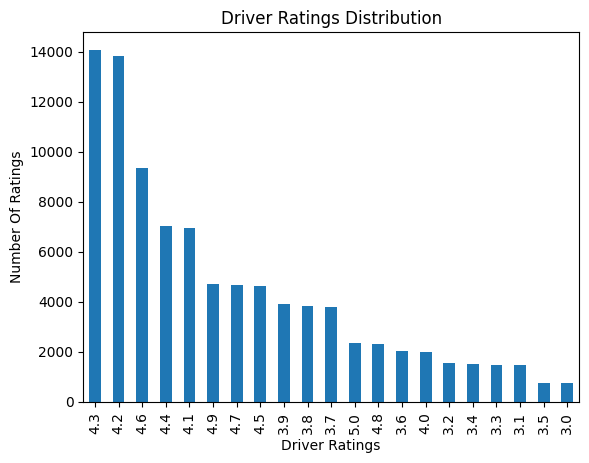

In [ ]:
## Driver ratings distribution.
df["Driver Ratings"].value_counts().plot(kind="bar",title='Driver Ratings Distribution')
plt.xlabel('Driver Ratings')
plt.ylabel('Number Of Ratings')
plt.show()

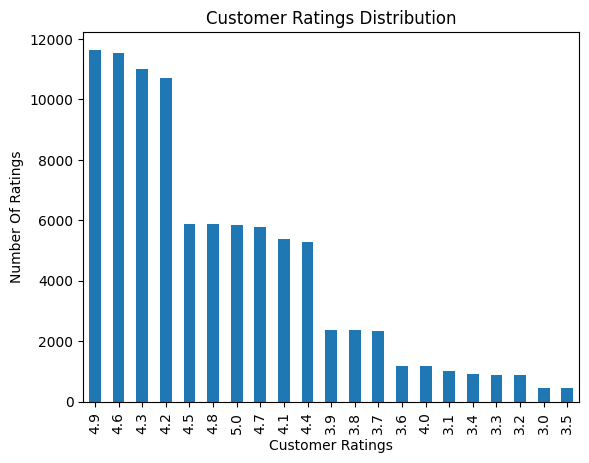

In [ ]:
## Driver ratings distribution.
df["Customer Rating"].value_counts().plot(kind="bar",title='Customer Ratings Distribution')
plt.xlabel('Customer Ratings')
plt.ylabel('Number Of Ratings')
plt.show()

### Most common cancellation reasons by customers and drivers.


In [ ]:
# By customers:
##Top customer cancellation reasons.
customer_cancel_reasons=df['Reason for cancelling by Customer'].value_counts()
print("most common customer reasons",customer_cancel_reasons)



most common customer reasons Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


In [ ]:
# By Driver:
##Top drier cancellation reasons.
driver_cancel_reasons=df['Driver Cancellation Reason'].value_counts()
print("Most Common Drier Cancellation Reasons",driver_cancel_reasons)



Most Common Drier Cancellation Reasons Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


## 3.Customer Behavior Insights

### Frequent cancellers(by customerID)

In [ ]:
# filter only customer_cancelled rides
df['Booking Status']=df['Booking Status'].str.strip().str.lower()
Freq_cancel=(df[df['Booking Status']=="cancelled by customer"]['Customer ID'].value_counts().head())
print(Freq_cancel)

Customer ID
"CID2358909"    2
"CID5251785"    2
"CID5505307"    2
"CID8519067"    2
"CID7939117"    2
Name: count, dtype: int64


### pattern in cancellations by time of day or day of weeks.

In [ ]:
# Normalize booking status
df['Booking Status']=df['Booking Status'].str.strip().str.lower()



In [ ]:
# Ensure Date and Time are datetime
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
# If Time is string like '12:30:00',convert it:
df['Hour']=pd.to_datetime(df['Time'],errors='coerce').dt.hour
#Day of Week
df['Day Of Week']=df['Date'].dt.day_name()
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Hour,Day Of Week
0,2024-03-23,12:29:38,"""CNR5884300""",no driver found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Saturday
1,2024-11-29,18:01:39,"""CNR1326809""",incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,18,Friday
2,2024-08-23,08:56:10,"""CNR8494506""",completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,8,Friday
3,2024-10-21,17:17:25,"""CNR8906825""",completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,17,Monday
4,2024-09-16,22:08:00,"""CNR1950162""",completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,22,Monday


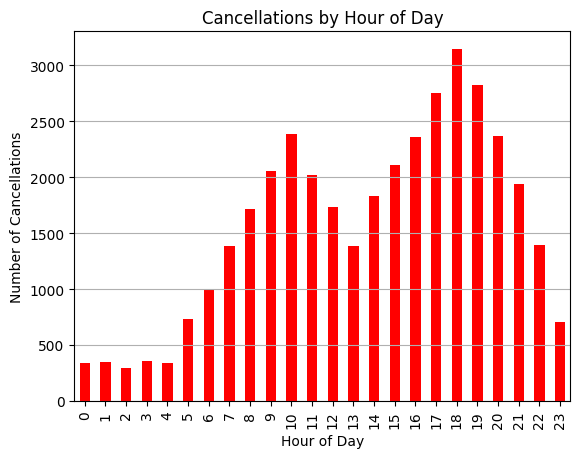

In [ ]:
# cancellation by hour of day
cancelled_rides = df[(df['Cancelled Rides by Customer'] == 1) | (df['Cancelled Rides by Driver'] == 1)]
cancel_by_hour = cancelled_rides['Hour'].value_counts().sort_index()

cancel_by_hour.plot(kind='bar', title='Cancellations by Hour of Day', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cancellations')
plt.grid(axis='y')
plt.show()

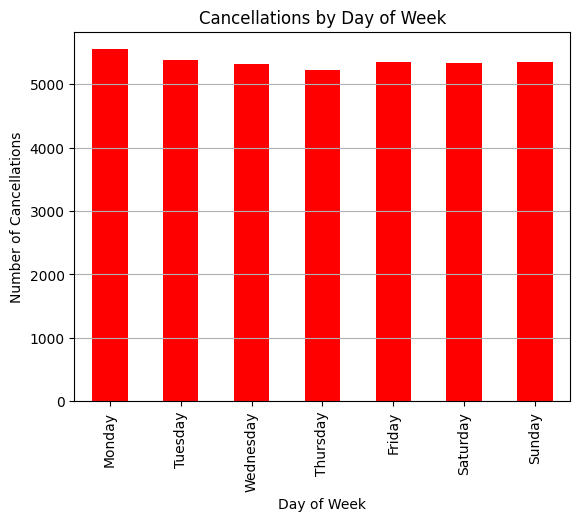

In [ ]:
# cancellation by day of week
cancelled_rides = df[(df['Cancelled Rides by Customer'] == 1) | (df['Cancelled Rides by Driver'] == 1)]
cancel_by_day = cancelled_rides['Day Of Week'].value_counts()

cancel_by_day.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(
    kind='bar', title='Cancellations by Day of Week', color='red'
)
plt.xlabel('Day of Week')
plt.ylabel('Number of Cancellations')
plt.grid(axis='y')
plt.show()

### correlation between ride value,distance and customer satisfication.

In [ ]:
# Filter only completed rides with valid ratings
completed = df[df['Booking Status'].str.lower() == 'completed']

# Convert columns to numeric if needed
completed['Booking Value'] = pd.to_numeric(completed['Booking Value'], errors='coerce')
completed['Ride Distance'] = pd.to_numeric(completed['Ride Distance'], errors='coerce')
completed['Customer Rating'] = pd.to_numeric(completed['Customer Rating'], errors='coerce')

# Correlation matrix
correlation = completed[['Booking Value', 'Ride Distance', 'Customer Rating']].corr()

print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                  Booking Value  Ride Distance  Customer Rating
Booking Value         1.000000       0.005668        -0.000287
Ride Distance         0.005668       1.000000         0.004514
Customer Rating      -0.000287       0.004514         1.000000


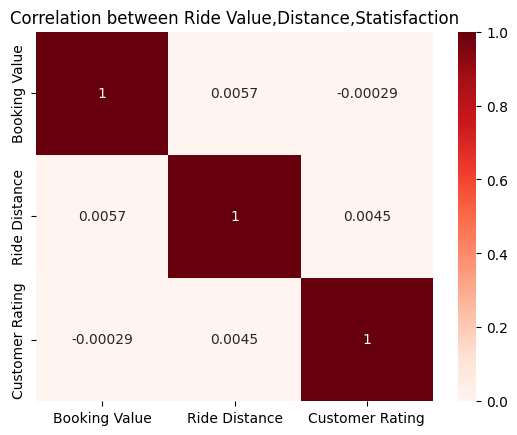

In [ ]:
correlation = completed[['Booking Value', 'Ride Distance', 'Customer Rating']].corr()
sns.heatmap(correlation,annot=True,cmap="Reds")
plt.title("Correlation between Ride Value,Distance,Statisfaction")
plt.show()

## 4.Driver Performance Evaluation

### The drivers with the highest and lowest ratings.

In [ ]:
# Group by Customer ID and calculate the average rating
driver_ratings = df.groupby('Customer ID')['Driver Ratings'].mean().reset_index()

# Sort by 'Driver Ratings' to find highest/lowest ratings
highest_rated = driver_ratings.sort_values(by='Driver Ratings', ascending=False).head()
lowest_rated = driver_ratings.sort_values(by='Driver Ratings').head()

# Output for highest/lowest rated drivers
print("Highest Rated Drivers:")
print(highest_rated)
print("Lowest Rated Drivers:")
print(lowest_rated)

Highest Rated Drivers:
         Customer ID  Driver Ratings
35      "CID1001937"             5.0
148775  "CID9999314"             5.0
14960   "CID1903302"             5.0
141634  "CID9567386"             5.0
88066   "CID6329971"             5.0
Lowest Rated Drivers:
         Customer ID  Driver Ratings
78023   "CID5721535"             3.0
21198   "CID2287877"             3.0
107096  "CID7481524"             3.0
125126  "CID8565526"             3.0
101099  "CID7118089"             3.0


### How many rides are being cancelled by drivers and why?

The total rides cancelled by driver is:27000.0



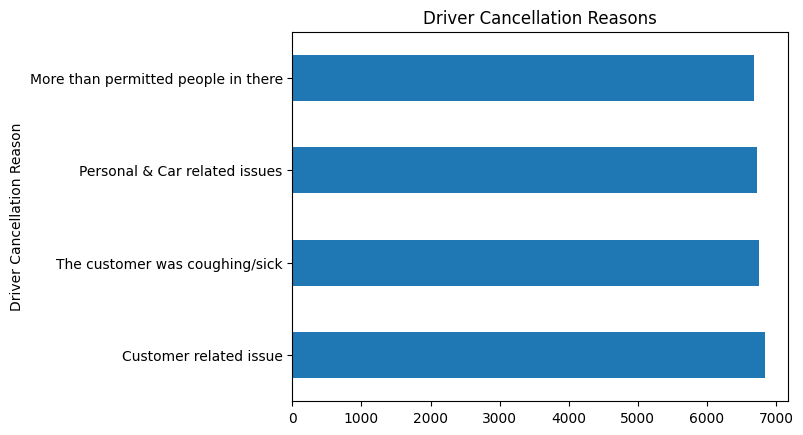

In [ ]:
driver_cancel=df["Cancelled Rides by Driver"].sum()
print(f"The total rides cancelled by driver is:{driver_cancel}\n")
cancel_driver=df['Driver Cancellation Reason'].dropna().value_counts()
cancel_driver.plot(kind='barh',title="Driver Cancellation Reasons")
plt.show()

##5.Operational Metrics

### Average VTAT and CTAT across vehicle types and locations.

In [ ]:
Avg_VTAT=df.groupby(['Vehicle Type','Pickup Location'])[['Avg VTAT','Avg CTAT']].mean()
print(Avg_VTAT)

                              Avg VTAT   Avg CTAT
Vehicle Type Pickup Location                     
Auto         AIIMS            8.233898  29.209444
             Adarsh Nagar     8.567411  28.065839
             Akshardham       8.547594  28.457031
             Ambience Mall    8.635676  29.398507
             Anand Vihar      8.280788  30.115436
...                                ...        ...
eBike        Vidhan Sabha     8.560714  27.480000
             Vinobapuri       8.192593  30.466667
             Vishwavidyalaya  8.376712  29.091837
             Welcome          8.416981  28.732558
             Yamuna Bank      8.627586  29.100000

[1232 rows x 2 columns]


### Identify peak demand locations and time slots.

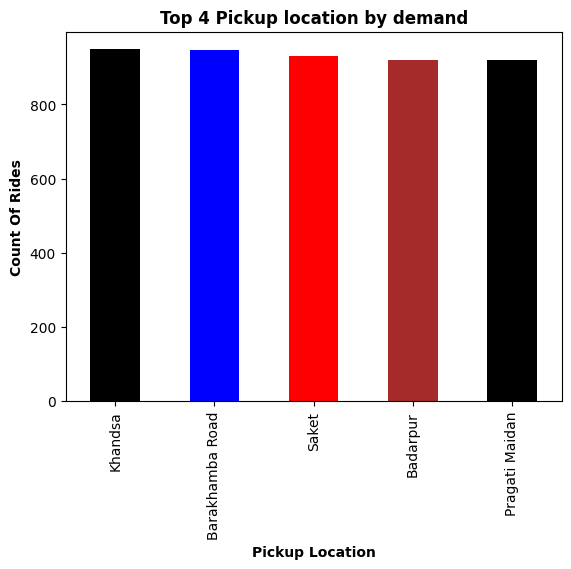

In [ ]:
## Peak Location
location_demand=df['Pickup Location'].value_counts().head()
location_demand.plot(kind='bar',color=['Black','Blue','Red','Brown'])
plt.title('Top 4 Pickup location by demand',fontweight='bold')
plt.xlabel("Pickup Location",fontweight="bold")
plt.xlabel("Pickup Location",fontweight="bold")
plt.ylabel("Count Of Rides",fontweight="bold")
plt.show()





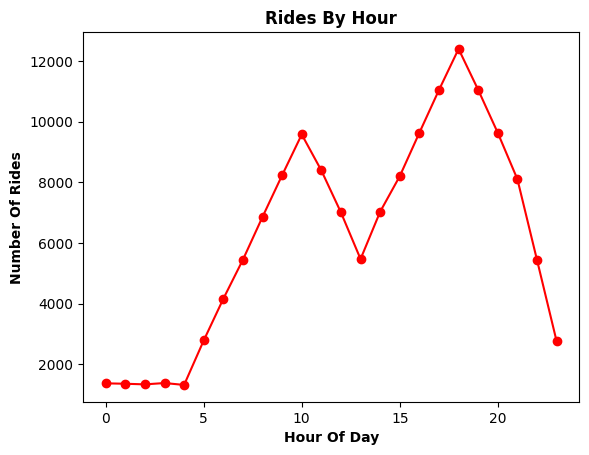

In [86]:
## Peak time
demand_time=df['Hour'].value_counts().sort_index()
demand_time.plot(kind='line',marker='o',color='red')
plt.title("Rides By Hour",fontweight='bold')
plt.xlabel("Hour Of Day",fontweight="bold")
plt.ylabel("Number Of Rides",fontweight="bold")
plt.show()



### Analyze booking statuses over time.

In [89]:
# Analyze booking statuses over time
df['Date'] = pd.to_datetime(df['Date'])
status_over_time = df.groupby(['Date', 'Booking Status']).size().unstack(fill_value=0)

<Figure size 1400x600 with 0 Axes>

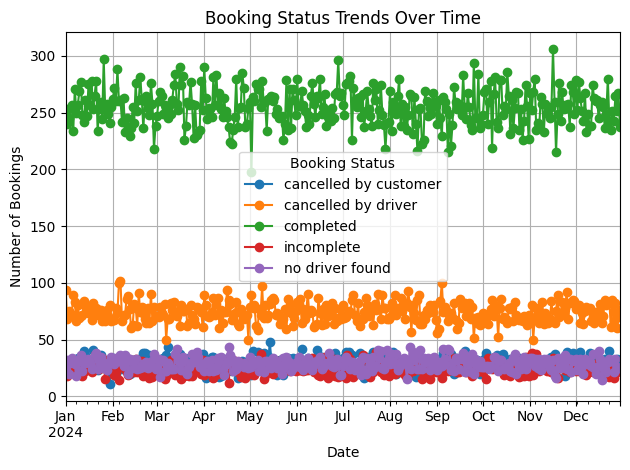

In [90]:
plt.figure(figsize=(14, 6))
status_over_time.plot(marker='o')

plt.title('Booking Status Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()